<a href="https://colab.research.google.com/github/JaiminPatel23/DL/blob/main/LAB/J035_DL_LAB07_15_02_21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Getting Data

In [ ]:
!wget --no-check-certificate \
    https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip \
    -O /tmp/cats_and_dogs_filtered.zip

--2021-03-28 13:29:26--  https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.217.212.128, 172.217.214.128, 108.177.111.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.217.212.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘/tmp/cats_and_dogs_filtered.zip’

/tmp/cats_and_dogs_ 100%[===================>]  65.43M   135MB/s    in 0.5s    

2021-03-28 13:29:26 (135 MB/s) - ‘/tmp/cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [ ]:
import os 
import zipfile 
import tensorflow as tf 
from tensorflow.keras.preprocessing.image import ImageDataGenerator 
from tensorflow.keras import layers 
from tensorflow.keras import Model 
import matplotlib.pyplot as plt

In [ ]:
local_zip = '/tmp/cats_and_dogs_filtered.zip'
zip_ref = zipfile.ZipFile(local_zip, 'r')
zip_ref.extractall('/tmp')
zip_ref.close()

base_dir = '/tmp/cats_and_dogs_filtered'
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with our training cat pictures
train_cats_dir = os.path.join(train_dir, 'cats')

# Directory with our training dog pictures
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with our validation cat pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')

# Directory with our validation dog pictures
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

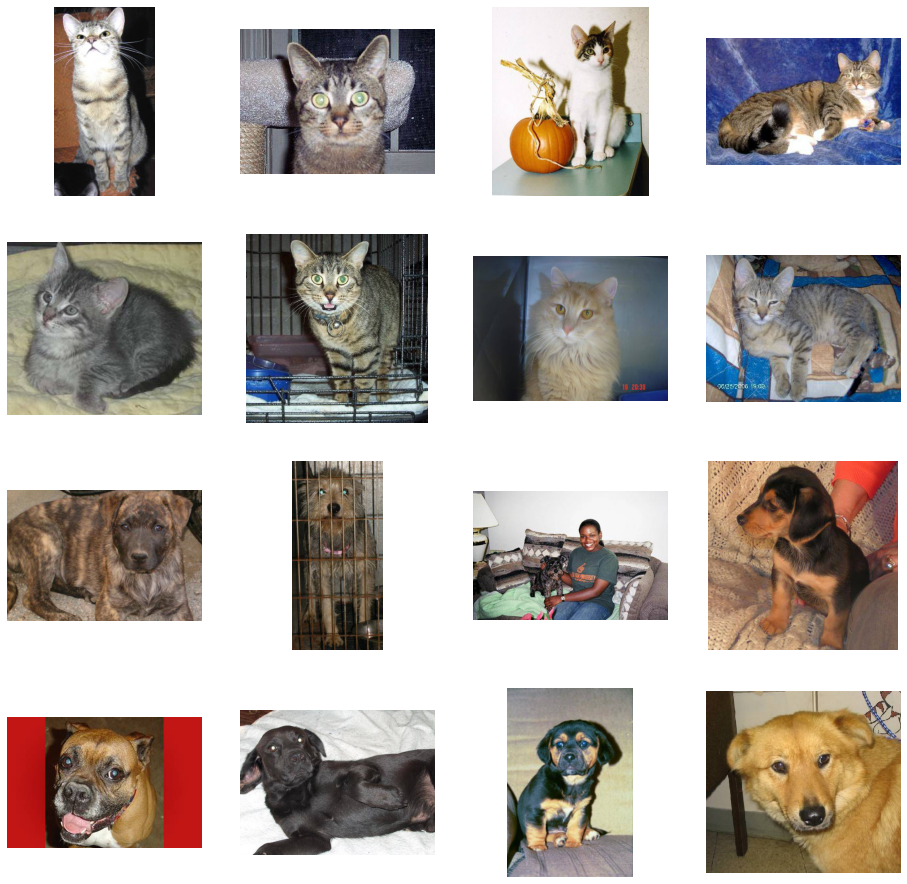

In [ ]:
# Set up matplotlib fig, and size it to fit 4x4 pics
import matplotlib.image as mpimg
nrows = 4
ncols = 4

fig = plt.gcf()
fig.set_size_inches(ncols*4, nrows*4)
pic_index = 100
train_cat_fnames = os.listdir( train_cats_dir )
train_dog_fnames = os.listdir( train_dogs_dir )


next_cat_pix = [os.path.join(train_cats_dir, fname) 
                for fname in train_cat_fnames[ pic_index-8:pic_index] 
               ]

next_dog_pix = [os.path.join(train_dogs_dir, fname) 
                for fname in train_dog_fnames[ pic_index-8:pic_index]
               ]

for i, img_path in enumerate(next_cat_pix+next_dog_pix):
  # Set up subplot; subplot indices start at 1
  sp = plt.subplot(nrows, ncols, i + 1)
  sp.axis('Off') # Don't show axes (or gridlines)

  img = mpimg.imread(img_path)
  plt.imshow(img)

plt.show()

#VGG16

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255.,rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)

# Note that the validation data should not be augmented!
test_datagen = ImageDataGenerator( rescale = 1.0/255. )

In [ ]:
# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory( validation_dir,  batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.vgg16 import VGG16

base_model = VGG16(input_shape = (224, 224, 3), # Shape of our images
include_top = False, # Leave out the last fully connected layer
weights = 'imagenet')

58892288/58889256 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
# Flatten the output layer to 1 dimension
x = layers.Flatten()(base_model.output)

# Add a fully connected layer with 512 hidden units and ReLU activation
x = layers.Dense(512, activation='relu')(x)

# Add a dropout rate of 0.5
x = layers.Dropout(0.5)(x)

# Add a final sigmoid layer for classification
x = layers.Dense(1, activation = 'sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)

model.compile(optimizer = tf.keras.optimizers.RMSprop(lr = 0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
vgghist = model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 1483s 15s/step - loss: 0.9009 - acc: 0.6302 - val_loss: 0.5164 - val_acc: 0.7070
Epoch 2/10
100/100 [==============================] - 1476s 15s/step - loss: 0.5215 - acc: 0.7386 - val_loss: 0.2726 - val_acc: 0.8910
Epoch 3/10
100/100 [==============================] - 1479s 15s/step - loss: 0.4260 - acc: 0.7872 - val_loss: 0.3386 - val_acc: 0.8390
Epoch 4/10
100/100 [==============================] - 1477s 15s/step - loss: 0.4109 - acc: 0.8019 - val_loss: 0.2210 - val_acc: 0.9180
Epoch 5/10
100/100 [==============================] - 1479s 15s/step - loss: 0.3646 - acc: 0.8385 - val_loss: 0.2120 - val_acc: 0.9150
Epoch 6/10
100/100 [==============================] - 1475s 15s/step - loss: 0.3499 - acc: 0.8446 - val_loss: 0.2083 - val_acc: 0.9210
Epoch 7/10
100/100 [==============================] - 1472s 15s/step - loss: 0.3395 - acc: 0.8511 - val_loss: 0.1980 - val_acc: 0.9180
Epoch 8/10
100/100 [==============================] - 1

#Inception

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator
train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2,shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255. )

In [ ]:
train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))
validation_generator = test_datagen.flow_from_directory(validation_dir, batch_size = 20, class_mode = 'binary', target_size = (150, 150))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications.inception_v3 import InceptionV3
base_model = InceptionV3(input_shape = (150, 150, 3), include_top = False, weights = 'imagenet')

87916544/87910968 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.optimizers import RMSprop

x = layers.Flatten()(base_model.output)
x = layers.Dense(1024, activation='relu')(x)
x = layers.Dropout(0.2)(x)
x = layers.Dense(1, activation='sigmoid')(x)

model = tf.keras.models.Model(base_model.input, x)
model.compile(optimizer = RMSprop(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
inc_history = model.fit_generator(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
100/100 [==============================] - 157s 2s/step - loss: 2.7472 - acc: 0.7816 - val_loss: 0.2824 - val_acc: 0.9250
Epoch 2/10
100/100 [==============================] - 150s 2s/step - loss: 0.4505 - acc: 0.8757 - val_loss: 0.2622 - val_acc: 0.9370
Epoch 3/10
100/100 [==============================] - 151s 2s/step - loss: 0.4134 - acc: 0.8815 - val_loss: 0.1136 - val_acc: 0.9580
Epoch 4/10
100/100 [==============================] - 151s 2s/step - loss: 0.3915 - acc: 0.8899 - val_loss: 0.1293 - val_acc: 0.9600
Epoch 5/10
100/100 [==============================] - 151s 2s/step - loss: 0.2755 - acc: 0.9221 - val_loss: 0.1744 - val_acc: 0.9450
Epoch 6/10
100/100 [==============================] - 151s 2s/step - loss: 0.3337 - acc: 0.9110 - val_loss: 0.1558 - val_acc: 0.9520
Epoch 7/10
100/100 [==============================] - 151s 2s/step - loss: 0.2518 - acc: 0.9324 - val_loss: 0.1446 - val_acc: 0.9600
Epoch 8/10
100/100 [==============================] - 151s 2s/step - 

#ResNet50

In [ ]:
# Add our data-augmentation parameters to ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255., rotation_range = 40, width_shift_range = 0.2, height_shift_range = 0.2, shear_range = 0.2, zoom_range = 0.2, horizontal_flip = True)
test_datagen = ImageDataGenerator(rescale = 1.0/255.)

train_generator = train_datagen.flow_from_directory(train_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))
validation_generator = test_datagen.flow_from_directory( validation_dir, batch_size = 20, class_mode = 'binary', target_size = (224, 224))

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
from tensorflow.keras.applications import ResNet50

base_model = ResNet50(input_shape = (224, 224, 3), include_top = False, weights = "imagenet")

94773248/94765736 [==============================] - 1s 0us/step


In [ ]:
for layer in base_model.layers:
    layer.trainable = False

In [ ]:
from tensorflow.keras.applications import ResNet50
from tensorflow.python.keras.models import Sequential
from tensorflow.python.keras.layers import Dense, Flatten, GlobalAveragePooling2D

base_model = Sequential()
base_model.add(ResNet50(include_top = False, weights = 'imagenet', pooling = 'max'))
base_model.add(Dense(1, activation = 'sigmoid'))

In [ ]:
base_model.compile(optimizer = tf.keras.optimizers.SGD(lr=0.0001), loss = 'binary_crossentropy', metrics = ['acc'])

In [ ]:
resnet_history = base_model.fit(train_generator, validation_data = validation_generator, steps_per_epoch = 100, epochs = 10)

Epoch 1/10
100/100 [==============================] - 1522s 15s/step - loss: 1.3314 - acc: 0.6911 - val_loss: 3.0623 - val_acc: 0.5000
Epoch 2/10
100/100 [==============================] - 1529s 15s/step - loss: 0.6560 - acc: 0.8320 - val_loss: 5.7877 - val_acc: 0.5000
Epoch 3/10
100/100 [==============================] - 1537s 15s/step - loss: 0.4873 - acc: 0.8678 - val_loss: 5.1423 - val_acc: 0.5000
Epoch 4/10
100/100 [==============================] - 1540s 15s/step - loss: 0.3831 - acc: 0.8995 - val_loss: 4.9769 - val_acc: 0.5010
Epoch 5/10
100/100 [==============================] - 1530s 15s/step - loss: 0.3558 - acc: 0.9012 - val_loss: 3.5021 - val_acc: 0.5220
Epoch 6/10
100/100 [==============================] - 1530s 15s/step - loss: 0.2878 - acc: 0.9162 - val_loss: 3.0311 - val_acc: 0.5560
Epoch 7/10
100/100 [==============================] - 1489s 15s/step - loss: 0.3175 - acc: 0.9113 - val_loss: 2.1158 - val_acc: 0.6730
Epoch 8/10
100/100 [==============================] - 1